# Multi-Layer Perceptron (MLP)

### XOR gate
| $x_1$ | $x_2$ | XOR | AND | OR  |
| --- | --- | --- |--- | --- |
| 1   |  1  |  0  | 1  |  1  |
| 1   |  0  |  1  | 0  |  1  |
| 0   |  1  |  1  | 0  |  1  |
| 0   |  0  |  0  | 0  |  0  |

In [18]:
import numpy as np
X = np.array([[1,1],[1,0],[0,1],[0,0]])
xor = np.array([0,1,1,0])
OR = np.array([1,1,1,0])

In [19]:
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

net_OR = models.Sequential()
net_OR.add(layers.Dense(1, activation='sigmoid'))
net_OR.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['binary_accuracy'])

net_OR.fit(X, OR, epochs=1000, verbose=0)

In [20]:
net_OR.predict(X)

array([[0.9617573 ],
       [0.7631264 ],
       [0.8631369 ],
       [0.44687098]], dtype=float32)

In [21]:
net_OR.get_weights()

[array([[1.383218 ],
        [2.0549135]], dtype=float32), array([-0.21332137], dtype=float32)]

In [22]:
net_xor = models.Sequential()
net_xor.add(layers.Dense(1, activation='sigmoid'))
net_xor.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['binary_accuracy'])

net_xor.fit(X, xor, epochs=100, verbose=0)
net_xor.predict(X)

array([[0.24669838],
       [0.52412647],
       [0.24565595],
       [0.52272516]], dtype=float32)

In [23]:
net_xor.get_weights()

[array([[ 0.00561749],
        [-1.21288   ]], dtype=float32), array([0.09096334], dtype=float32)]

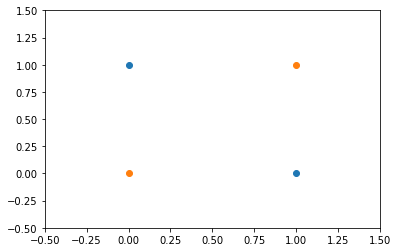

In [24]:
x=np.arange(-1,2,0.1)
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.plot([1,0],[0,1],'o')
plt.plot([1,0],[1,0],'o')
plt.plot(x,)

### MLP (XOR gate)

In [25]:
net = models.Sequential()
net.add(layers.Dense(4, activation='relu'))
net.add(layers.Dense(1, activation='relu'))
net.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['binary_accuracy'])

net.fit(X, xor, epochs=1000, verbose=0)

In [26]:
net.predict(X)

array([[0.       ],
       [1.0058304],
       [1.0025616],
       [0.       ]], dtype=float32)

## MNIST

In [10]:
from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [11]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [12]:
net.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2786 - accuracy: 0.9225
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1084 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0695 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0497 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0348 - accuracy: 0.9901


In [13]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 0s 577us/step - loss: 0.0639 - accuracy: 0.9804


In [14]:
net.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
